In [ ]:
%pip install haversine
%pip install pandas
%pip install weather_au
%pip install requests
%pip install matplotlib


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import sys
import datetime
import requests
import smtplib
import csv

import pandas as pd
import matplotlib.pyplot as plt

from weather_au import api
from IPython.display import IFrame
import haversine as hs
from haversine import Unit
#https://developers.google.com/maps/documentation/embed/embedding-map#choosing_map_modes
#https://developers.google.com/maps/documentation/embed/get-started


In [ ]:
#read csv from here and take experimental data

import pandas as pd

files = [
    "AAAA.csv",
    "AAAB.csv",
    "AAAC.csv",
    "AAAD.csv",
    "AAAE.csv",
    "AAAF.csv",
    "AAAG.csv",
    "AAAH.csv",
    "AAAI.csv",
    "AAAJ.csv",
]

dfs = []
for file in files:
    file_df = pd.read_csv (
        f"../{file}",
        sep=',',
        names=[
            "R_Time", "Comm_ID", "Pkt_Set", "Pkt_ID", "S_Lat", "S_Lng",
            "Pkt_BW", "Pkt_CR", "Pkt_Freq", "Pkt_SF", "Pkt_Tx_Pwr", "Pkt_RSSI",
            "Now_RSSI", "Pkt_SNR", "R_Lat", "R_Lng"
        ]
    )
    dfs.append(file_df)

df = pd.concat(dfs)
df.reset_index()
df

,R_Time,Comm_ID,Pkt_Set,Pkt_ID,S_Lat,S_Lng,Pkt_BW,Pkt_CR,Pkt_Freq,Pkt_SF,Pkt_Tx_Pwr,Pkt_RSSI,Now_RSSI,Pkt_SNR,R_Lat,R_Lng
0,02:42:04,AAAA,0,8,-31.977924,115.815896,250000,5,915000000,10,20,-54,-124,11.25,-31.977919,115.816030
1,02:42:05,AAAA,0,9,-31.977925,115.815895,250000,5,915000000,10,20,-57,-128,13.00,-31.977923,115.816029
2,02:42:06,AAAA,0,10,-31.977927,115.815875,250000,5,915000000,10,20,-56,-123,14.00,-31.977930,115.816025
3,02:42:07,AAAA,0,11,-31.977928,115.815867,250000,5,915000000,10,20,-55,-122,11.50,-31.977932,115.816023
4,02:42:09,AAAA,0,12,-31.977931,115.815859,250000,5,915000000,10,20,-56,-124,10.25,-31.977932,115.816024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,03:35:59,AAAJ,0,27,-31.977552,115.816133,250000,5,915000000,8,0,-59,-124,12.50,-31.977987,115.816076
127,03:36:00,AAAJ,0,28,-31.977596,115.816133,250000,5,915000000,8,0,-59,-123,12.25,-31.978026,115.816081
128,03:36:01,AAAJ,0,29,-31.977617,115.816127,250000,5,915000000,8,0,-56,-122,12.75,-31.978046,115.816081
129,03:36:02,AAAJ,0,30,-31.977628,115.816120,250000,5,915000000,8,0,-53,-122,12.50,-31.978074,115.816075


In [ ]:
dist = {'Distance': []}

for x in df.index:

    print(df[x])
    
    receiver_lat = float(df["R_Lat"][x])
    receiver_long = float(df["R_Lng"][x])
    receiver = str(receiver_lat) + "," + str(receiver_long)
    #print("Receiver:\t"+receiver)

    sender_lat = float(df["S_Lat"][x])
    sender_long =  float(df["S_Lng"][x])
    sender = str(sender_lat) + "," + str(sender_long)
    #print("Sender:\t\t"+sender)


    center_lat = (receiver_lat+sender_lat)/2
    center_long = (receiver_long+sender_long)/2
    center = str(center_lat) + "," + str(center_long)
    #print("center:\t\t"+center)


    loc1 = (receiver_lat,receiver_long)
    loc2 = (sender_lat,sender_long)

    distance = round(hs.haversine(loc1,loc2,unit=Unit.METERS),2)

    print("Distance between Sender and Receiver: "+str(distance)+ " Metres")


    dist["Distance"].append(distance)
    df2 = pd.DataFrame(dist)
    df2

TypeError: cannot convert the series to <class 'float'>

In [ ]:
#df2

In [ ]:
df = df.assign(Distance=df2)
df

,R_Time,Comm_ID,Pkt_Set,Pkt_ID,S_Lat,S_Lng,Pkt_BW,Pkt_CR,Pkt_Freq,Pkt_SF,Pkt_Tx_Pwr,Pkt_RSSI,Now_RSSI,Pkt_SNR,R_Lat,R_Lng,Distance
0,03:33:40,AAAJ,0,0,-31.977935,115.816136,250000,5,915000000,8,0,-55,-111,11.75,-31.977858,115.816053,11.60
1,03:33:41,AAAJ,0,1,-31.977921,115.816126,250000,5,915000000,8,0,-63,-124,12.25,-31.977864,115.816059,8.95
2,03:33:42,AAAJ,0,2,-31.977916,115.816126,250000,5,915000000,8,0,-60,-122,11.25,-31.977871,115.816061,7.91
3,03:33:43,AAAJ,0,3,-31.977921,115.816130,250000,5,915000000,8,0,-63,-124,12.00,-31.977865,115.816070,8.41
4,03:33:44,AAAJ,0,4,-31.977926,115.816138,250000,5,915000000,8,0,-71,-122,11.00,-31.977859,115.816100,8.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,03:35:59,AAAJ,0,27,-31.977552,115.816133,250000,5,915000000,8,0,-59,-124,12.50,-31.977987,115.816076,48.67
127,03:36:00,AAAJ,0,28,-31.977596,115.816133,250000,5,915000000,8,0,-59,-123,12.25,-31.978026,115.816081,48.06
128,03:36:01,AAAJ,0,29,-31.977617,115.816127,250000,5,915000000,8,0,-56,-122,12.75,-31.978046,115.816081,47.90
129,03:36:02,AAAJ,0,30,-31.977628,115.816120,250000,5,915000000,8,0,-53,-122,12.50,-31.978074,115.816075,49.77


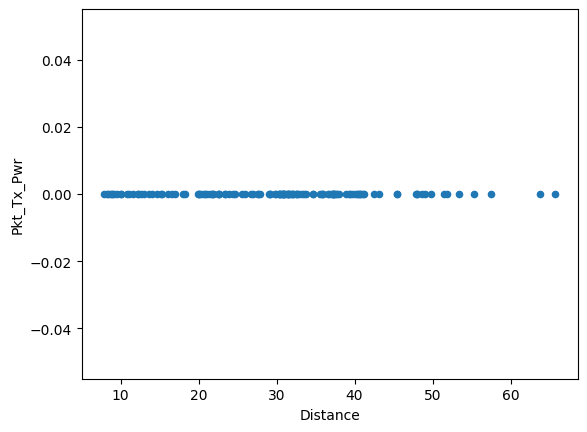

In [ ]:
ax = plt.gca()

df.plot(kind='scatter',x='Distance',y='Pkt_Tx_Pwr',ax=ax)

plt.show()


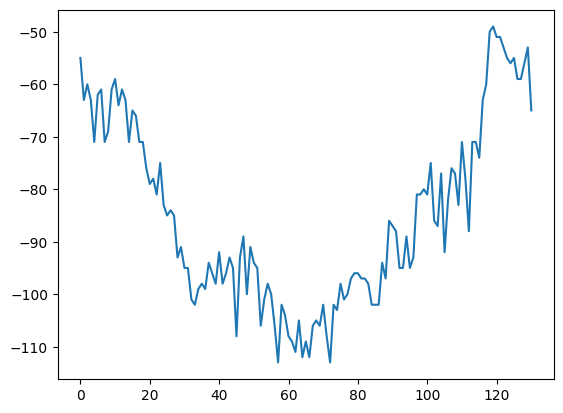

In [ ]:

ts = pd.Series(df['Pkt_RSSI'])
ts.plot();

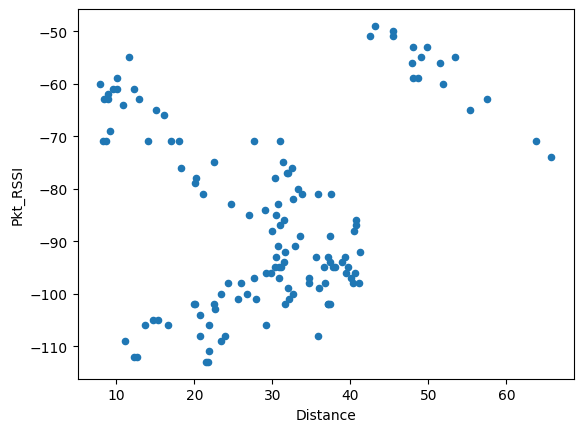

In [ ]:
# gca stands for 'get current axis'
ax = plt.gca()

df.plot(kind='scatter',x='Distance',y='Pkt_RSSI',ax=ax)

plt.show()

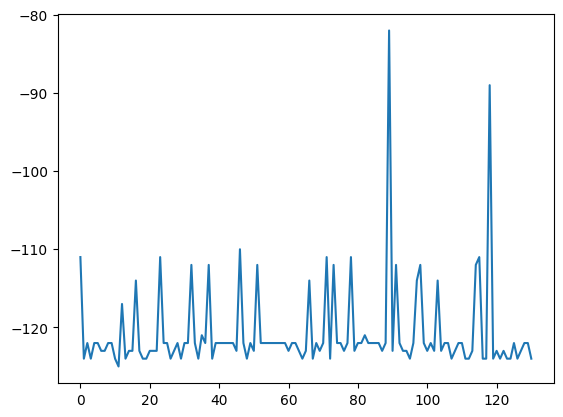

In [ ]:
ts = pd.Series(df['Now_RSSI'])
ts.plot();

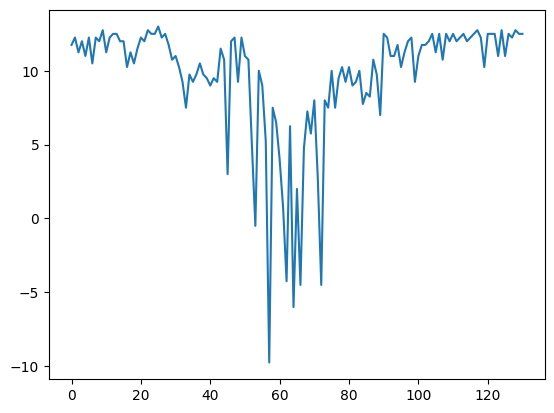

In [ ]:
ts = pd.Series(df['Pkt_SNR'])
ts.plot();

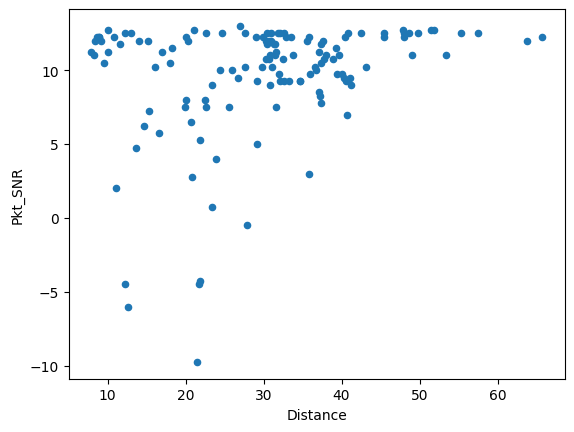

In [ ]:
# gca stands for 'get current axis'
ax = plt.gca()

df.plot(kind='scatter',x='Distance',y='Pkt_SNR',ax=ax)


plt.show()

In [ ]:
# Get the current time the notebook 
now = datetime.datetime.now()
time_string = now.strftime("%Y-%m-%d %H:%M:%S")
print(time_string)

2023-03-14 11:49:25


In [ ]:
# Used for basic mapping debugging
# If you would like to map a set of receiver/sender coordinates, follow this link to setup an api key:
# https://developers.google.com/maps/documentation/embed/get-api-key
# Store the key into the 'api_key' variable by plain text or by storing into a .txt file as below.
# It is recommended and good practice to store it in a separate text file as leaked api-keys are never a good thing.
# Uncomment the code below and run 



# api_file = open("api-key.txt", "r")
# api_key = api_file.read()
# api_file.close()

In [ ]:

# embed = "https://www.google.com/maps/embed/v1/directions?key="+api_key+"&origin="+receiver+"&destination="+sender+"&mode=flying&center="+center+"&zoom=16"
# print(embed)

In [ ]:
# IFrame(embed, width=600, height=600)

In [ ]:
w = api.WeatherApi(search='perth+wa', debug=0)

location = w.location()
# check if the search produced a result (other methods will also return None if the search fails).
if location is None:
    sys.exit('Search failed for location ' + loc)

print(f"\nLocation: {location['name']} {location['state']}, timezone:{location['timezone']}\n")


Location: East Perth WA, timezone:Australia/Perth



In [ ]:
for warn in w.warnings():
    print(f"Warning short title:  {warn['short_title']}")

    warning = w.warning(id=warn['id'])
    print(f"Warning title:        {warning['title']}")

In [ ]:
observations = w.observations()
print(f"\nObservations (temp): {observations['temp']:2}")
print(f"\nObservations (humidity): {observations['humidity']:2}")


Observations (temp): 28.3

Observations (humidity): 44


In [ ]:
print('\n3 Hourly:')
print('Note: Observations are from most recent to least. API is currently incorrect\n')

for f in w.forecasts_3hourly():
    print(f"{f['time']} temp:{f['temp']:2}, {f['icon_descriptor']}")


3 Hourly:
Note: Observations are from most recent to least. API is currently incorrect

2023-03-14T03:00:00Z temp:27, mostly_sunny
2023-03-14T06:00:00Z temp:29, sunny
2023-03-14T09:00:00Z temp:27, sunny
2023-03-14T12:00:00Z temp:23, sunny
2023-03-14T15:00:00Z temp:20, sunny
2023-03-14T18:00:00Z temp:17, sunny
2023-03-14T21:00:00Z temp:16, sunny
2023-03-15T00:00:00Z temp:18, sunny
2023-03-15T03:00:00Z temp:27, sunny
2023-03-15T06:00:00Z temp:30, sunny
2023-03-15T09:00:00Z temp:27, sunny
2023-03-15T12:00:00Z temp:23, sunny
2023-03-15T15:00:00Z temp:21, mostly_sunny
2023-03-15T18:00:00Z temp:18, mostly_sunny
2023-03-15T21:00:00Z temp:17, mostly_sunny
2023-03-16T00:00:00Z temp:19, shower
2023-03-16T03:00:00Z temp:26, shower
